## Cricket Analysis using Hierarchical Clustering
#### Runs scored by Players in ICC Test Cricket

- Player - Name of the Player
- Span - Period/Span
- Mat - Matches Played
- Inn - Innings
- NO - Not Outs
- Runs - Runs Scored
- HS - Highest Score
- Avg - Batting Avg
- 100 - Hundreds
- 50 - Fifties
- 0 - Duck Outs

In [104]:
import numpy as np
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv('Cricket.csv',encoding='latin-1')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00
0,79.0,13.253165,5.925755,3.00,9.000,13.00,16.000,34.00


In [108]:
df[df.duplicated()]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0


**Insights-**
- There are 12 features in the dataset out of which 3 datasets are object type and rest all are either integer or float.
- There are total 79 rows in our dataset with no null values.
- There are no duplicates values in the dataset
- The mean runs scored is 7618 whereas the max value is 18426 which is considered as outlier but in reality it is not an outlier.
- No of 100s has minimum range of 0 and max value is 49 matches.


### Data Cleaning

In [109]:
df['HS']

0     200*
1      169
2      164
3      189
4      144
      ... 
74    133*
75     96*
76    120*
77     156
78     112
Name: HS, Length: 79, dtype: object

There are values in our HS columns which has '*' which makes the entire feature object even after having num values 

In [110]:
df['HS'] = df['HS'].str.replace('*','').astype(int)
df['HS']

0     200
1     169
2     164
3     189
4     144
     ... 
74    133
75     96
76    120
77    156
78    112
Name: HS, Length: 79, dtype: int32

In [111]:
# To convert the span into years of experience
# we first split the span into start and end and store in new column
df[['Start','End']] = df['Span'].str.split('-',expand=True)
df[['Start','End']] = df[['Start','End']].astype(int)
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [112]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now
df['Exp'] = df['End'] - df['Start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [113]:
df = df.drop(['Start','End','Span'],axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


### Exploratory Data Analysis

Mat


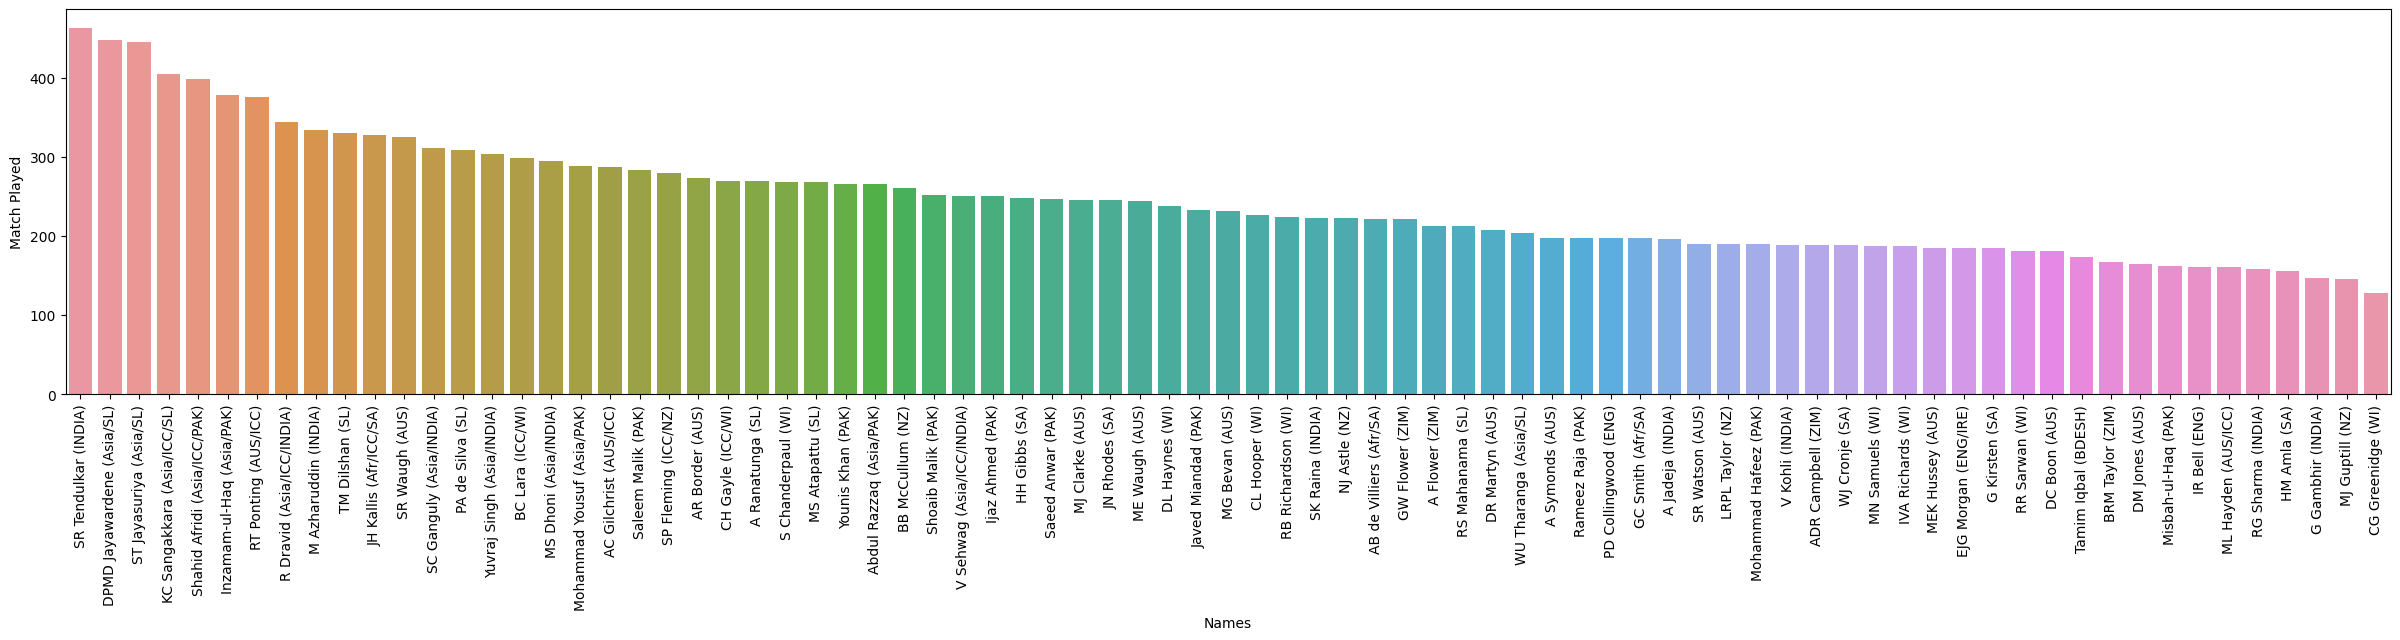

Inns


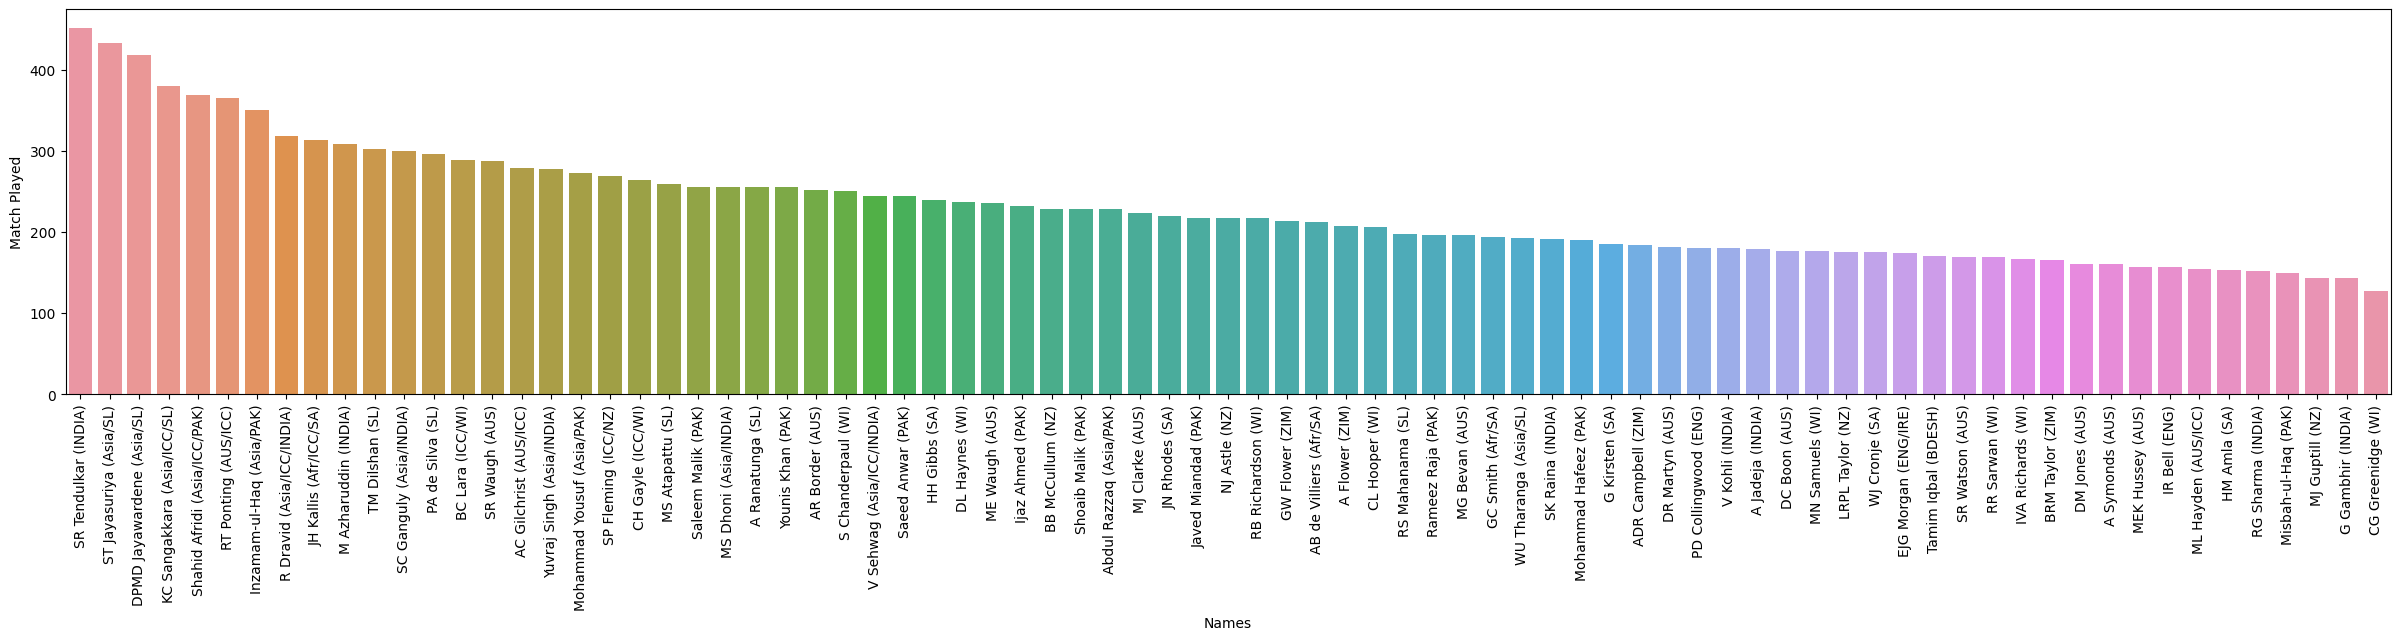

NO


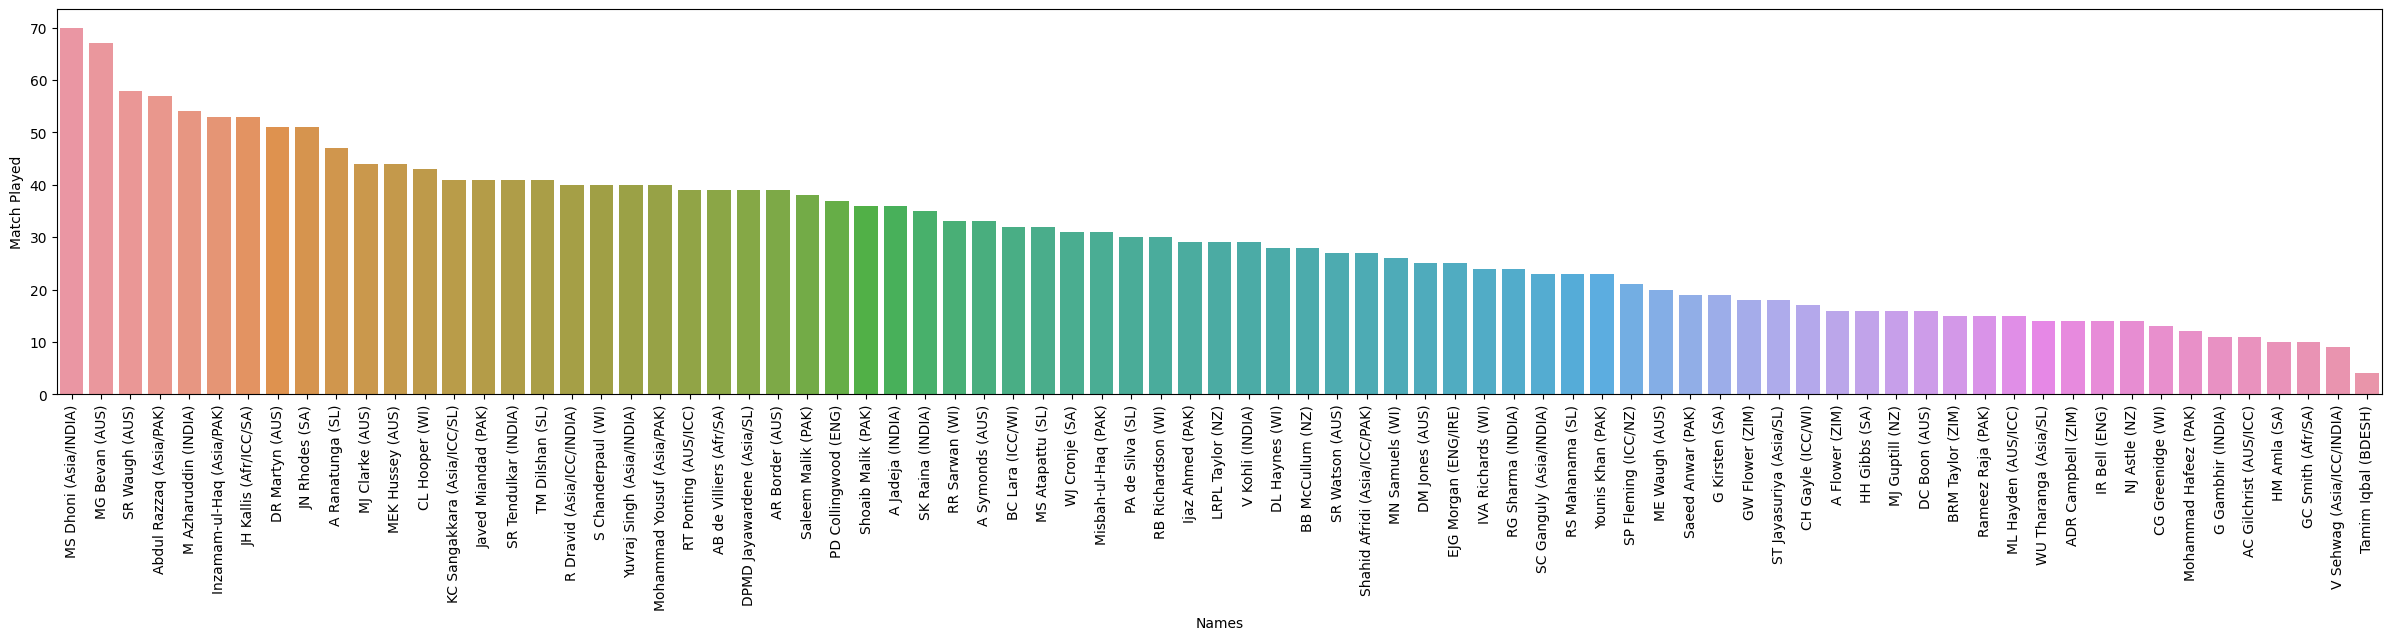

Runs


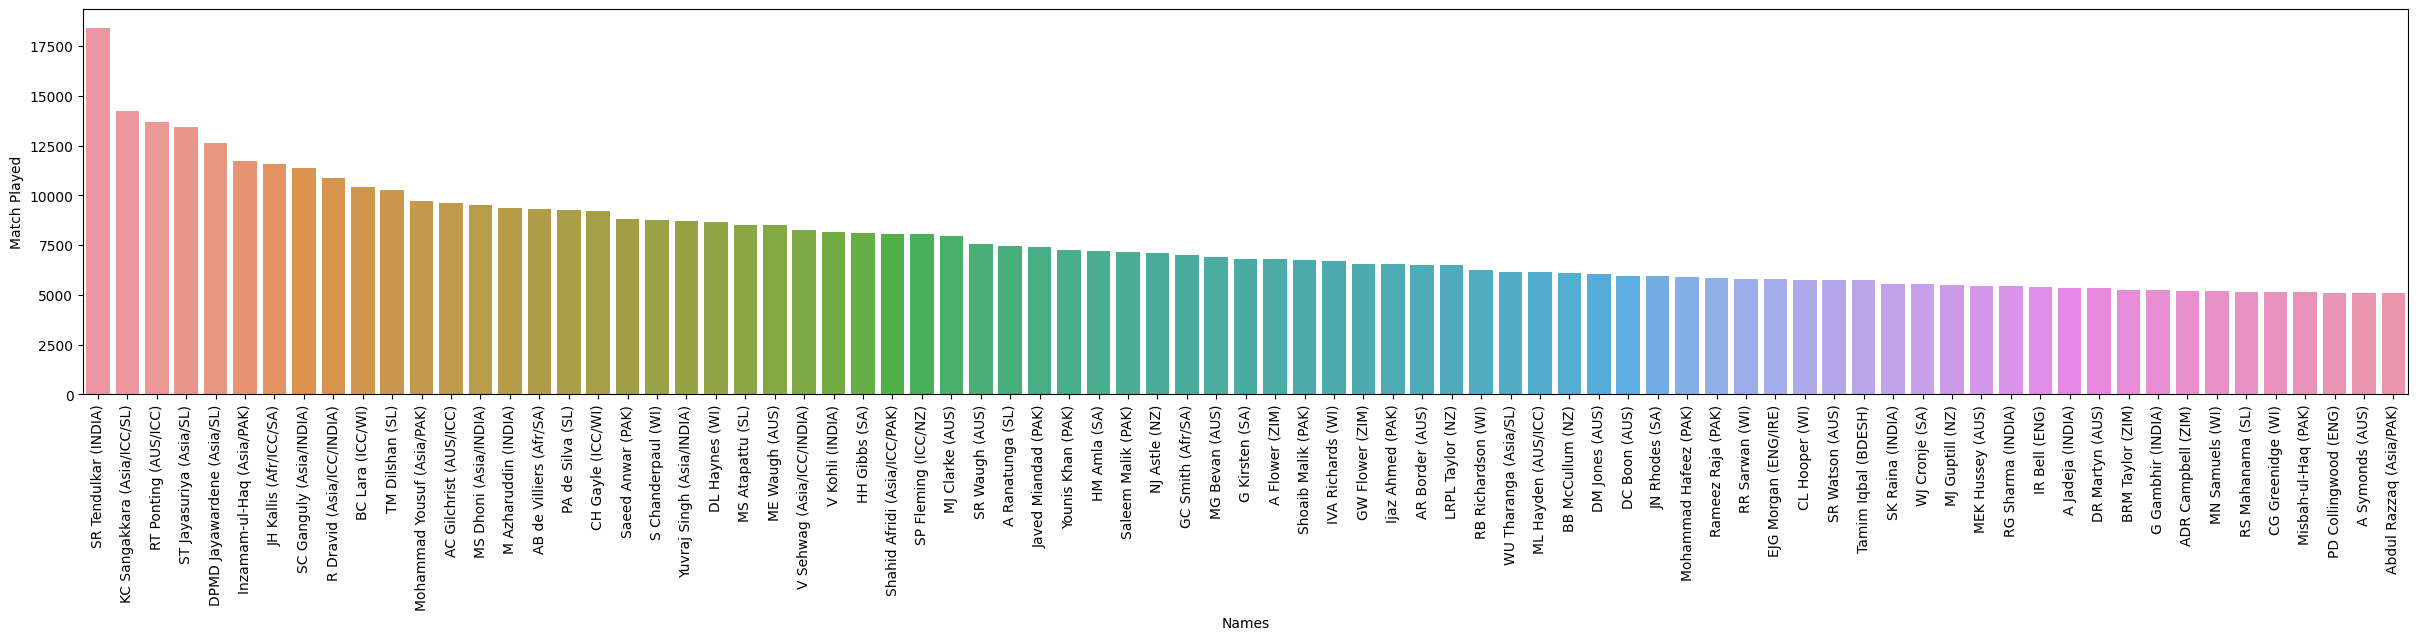

HS


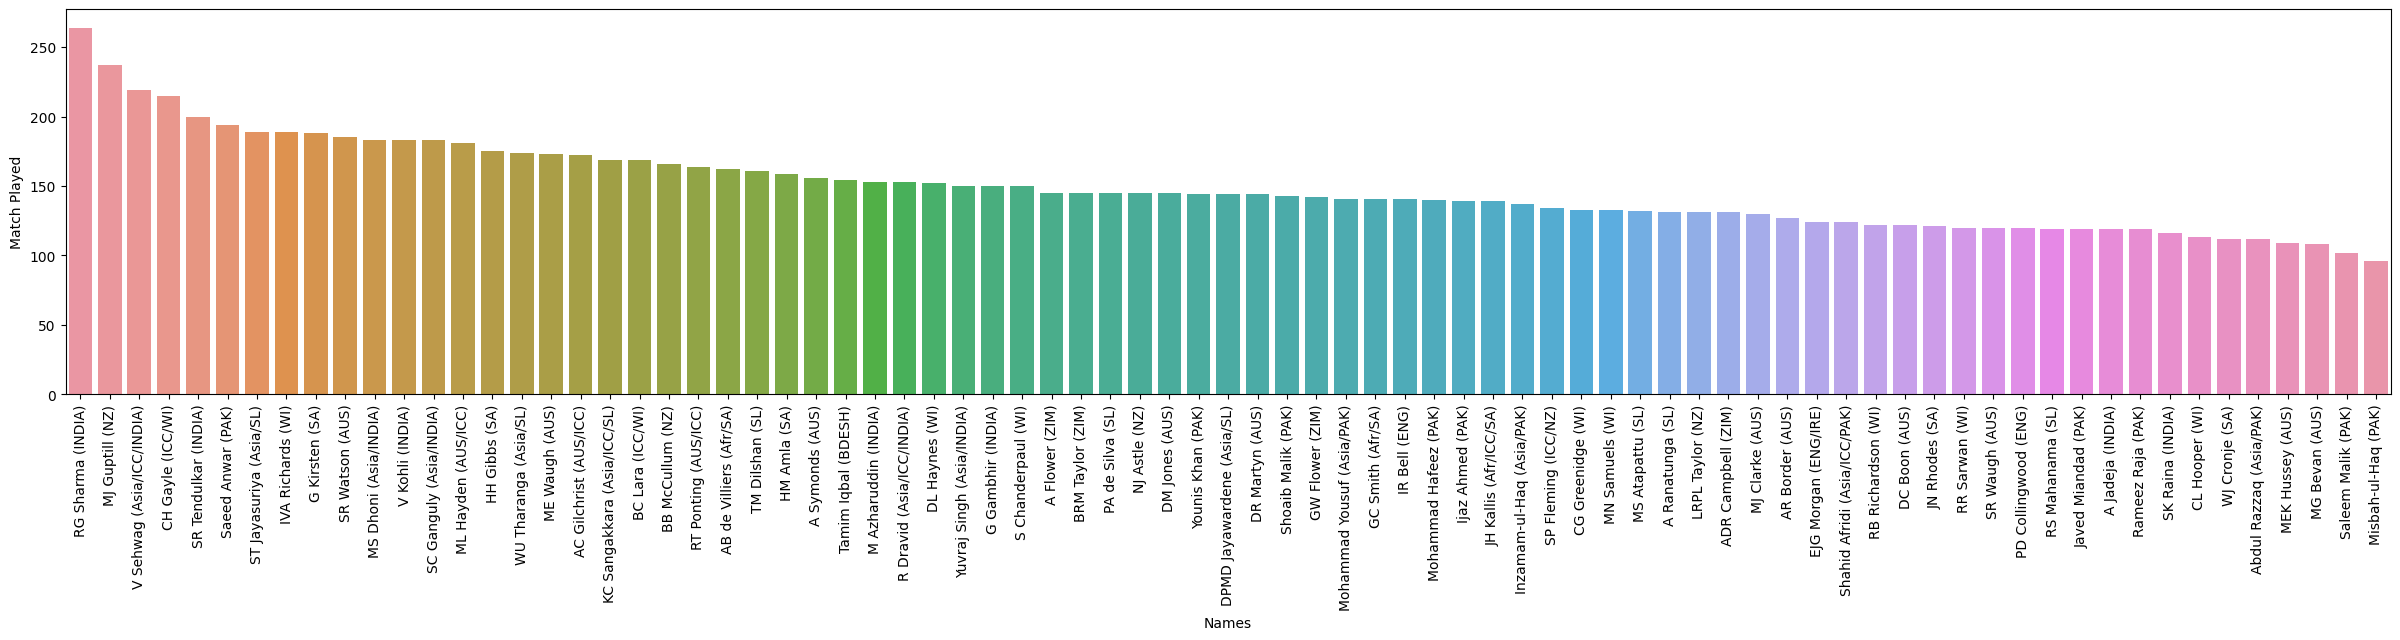

Ave


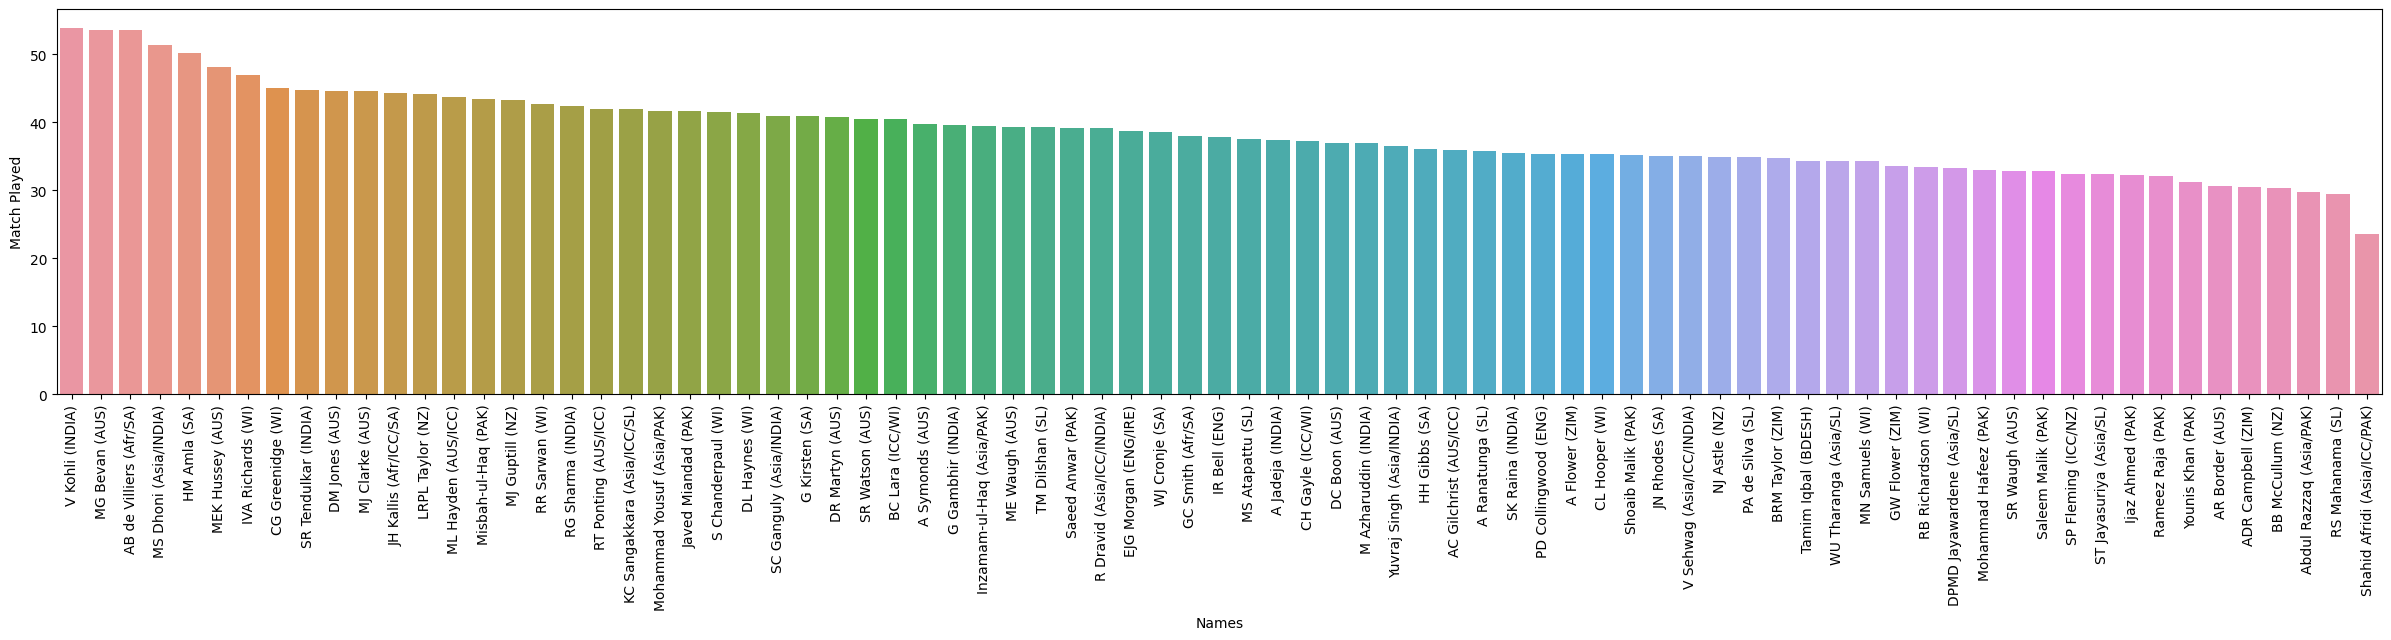

BF


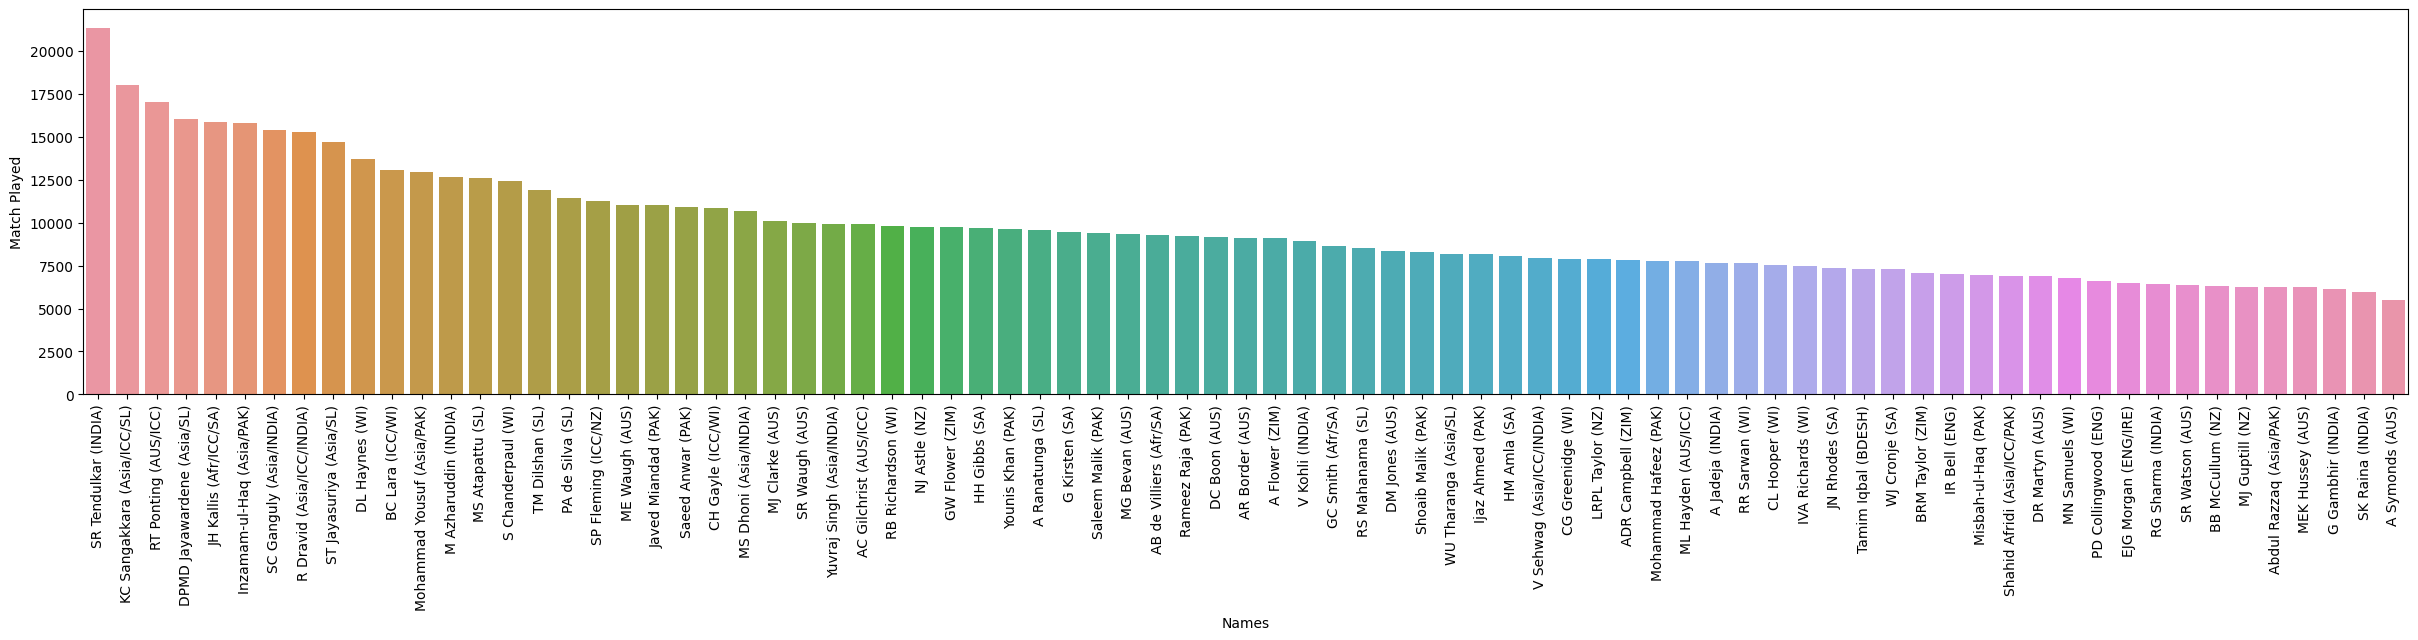

SR


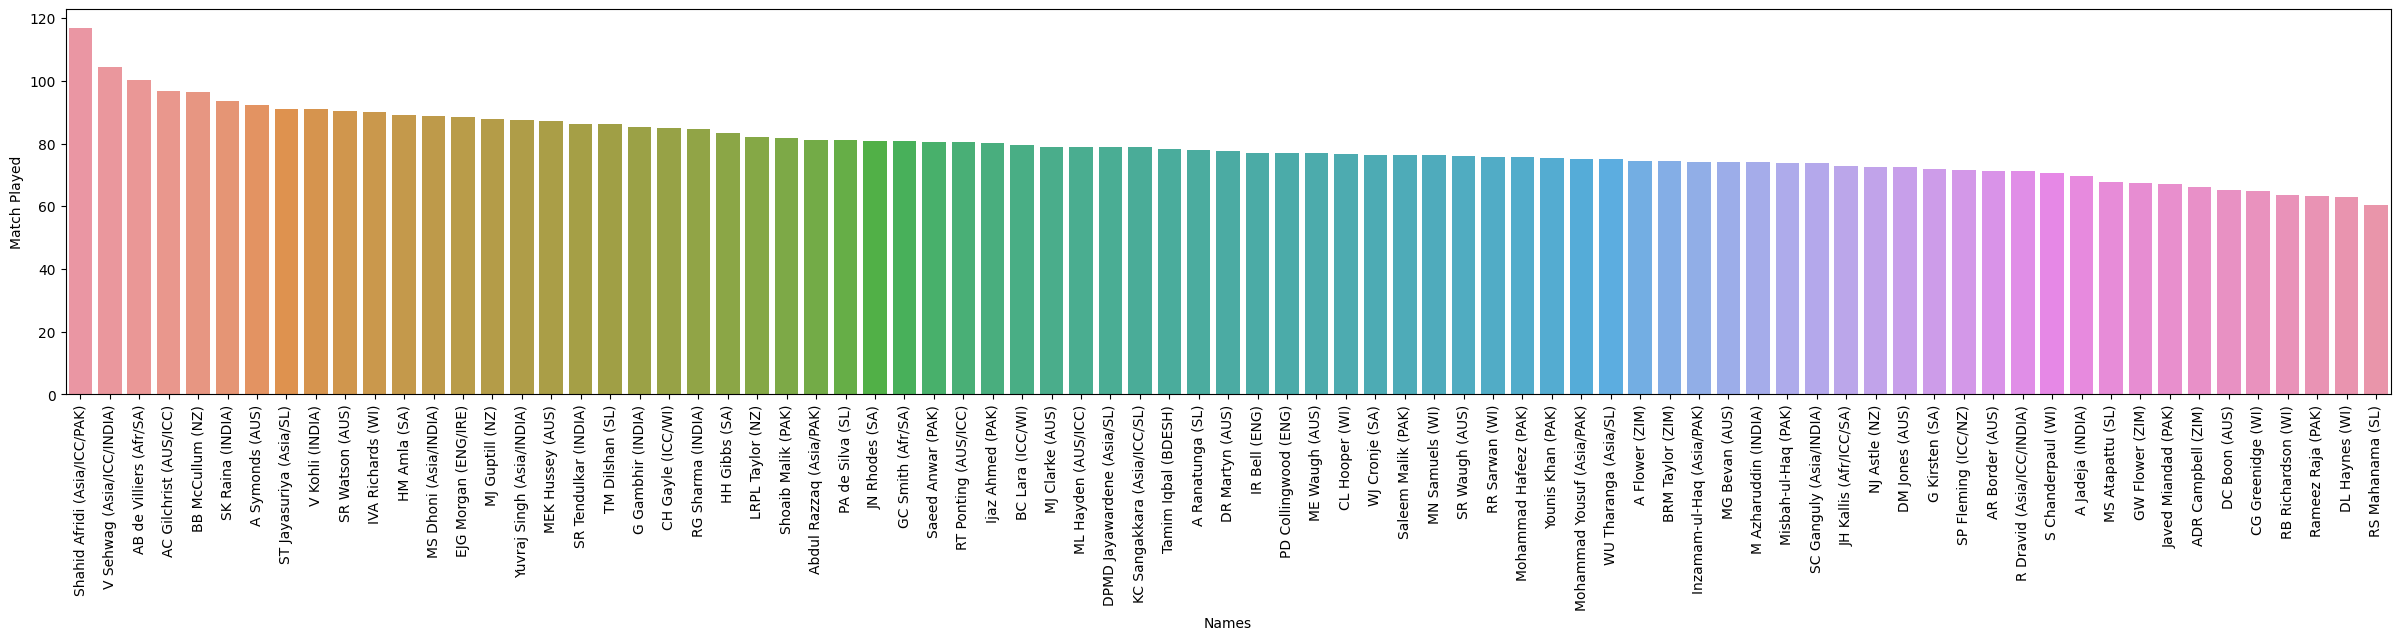

100


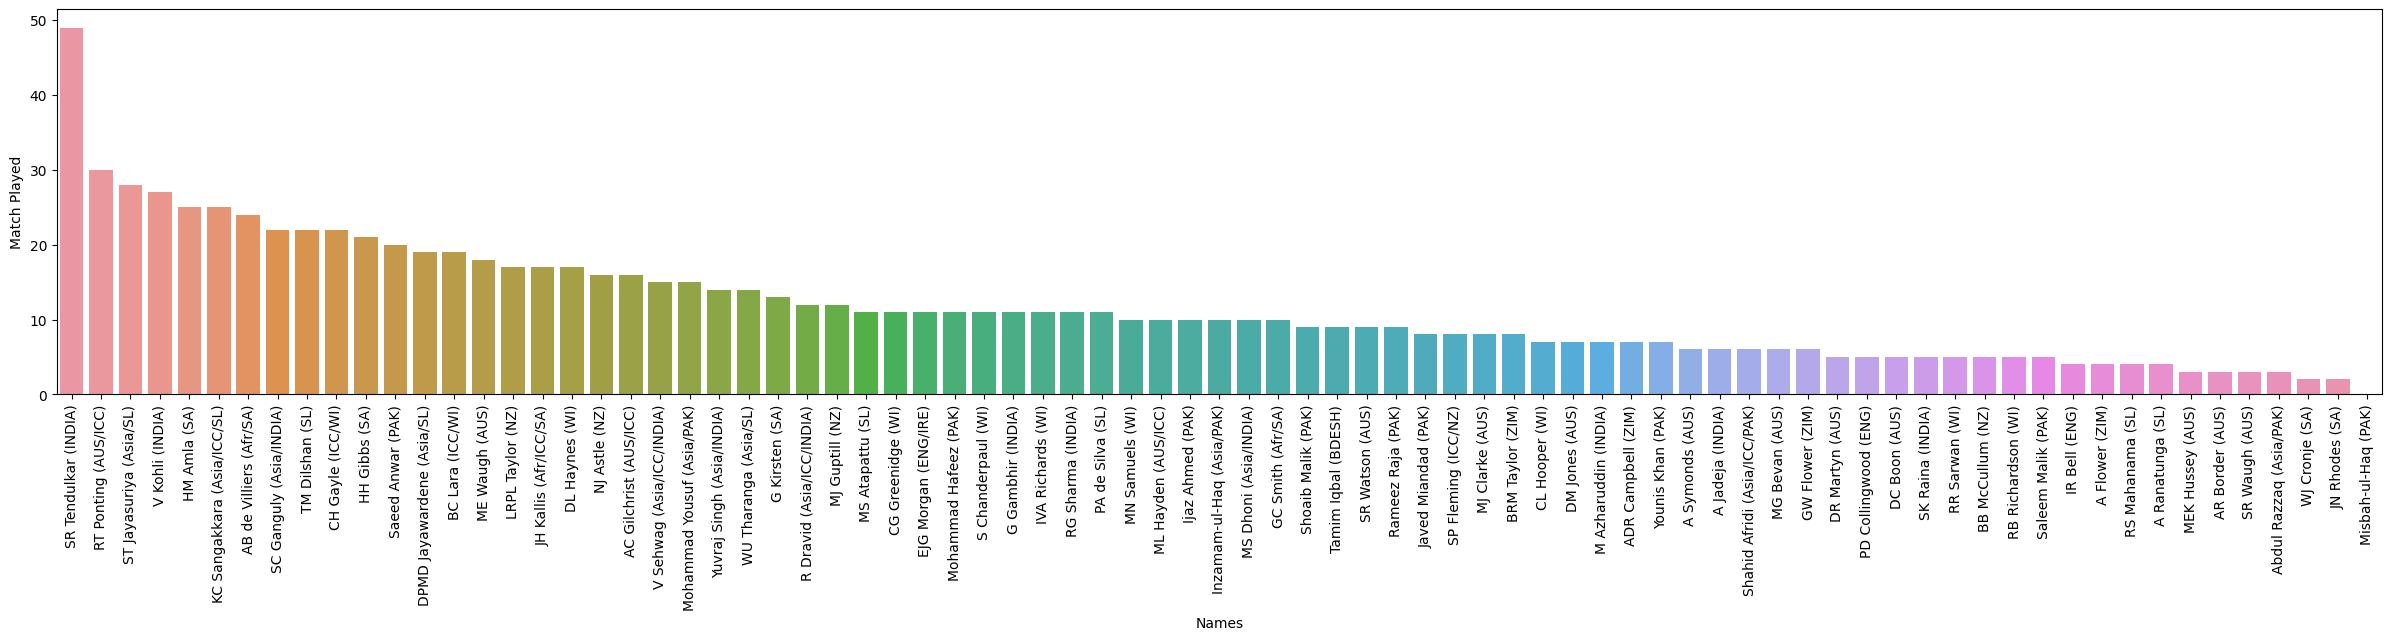

50


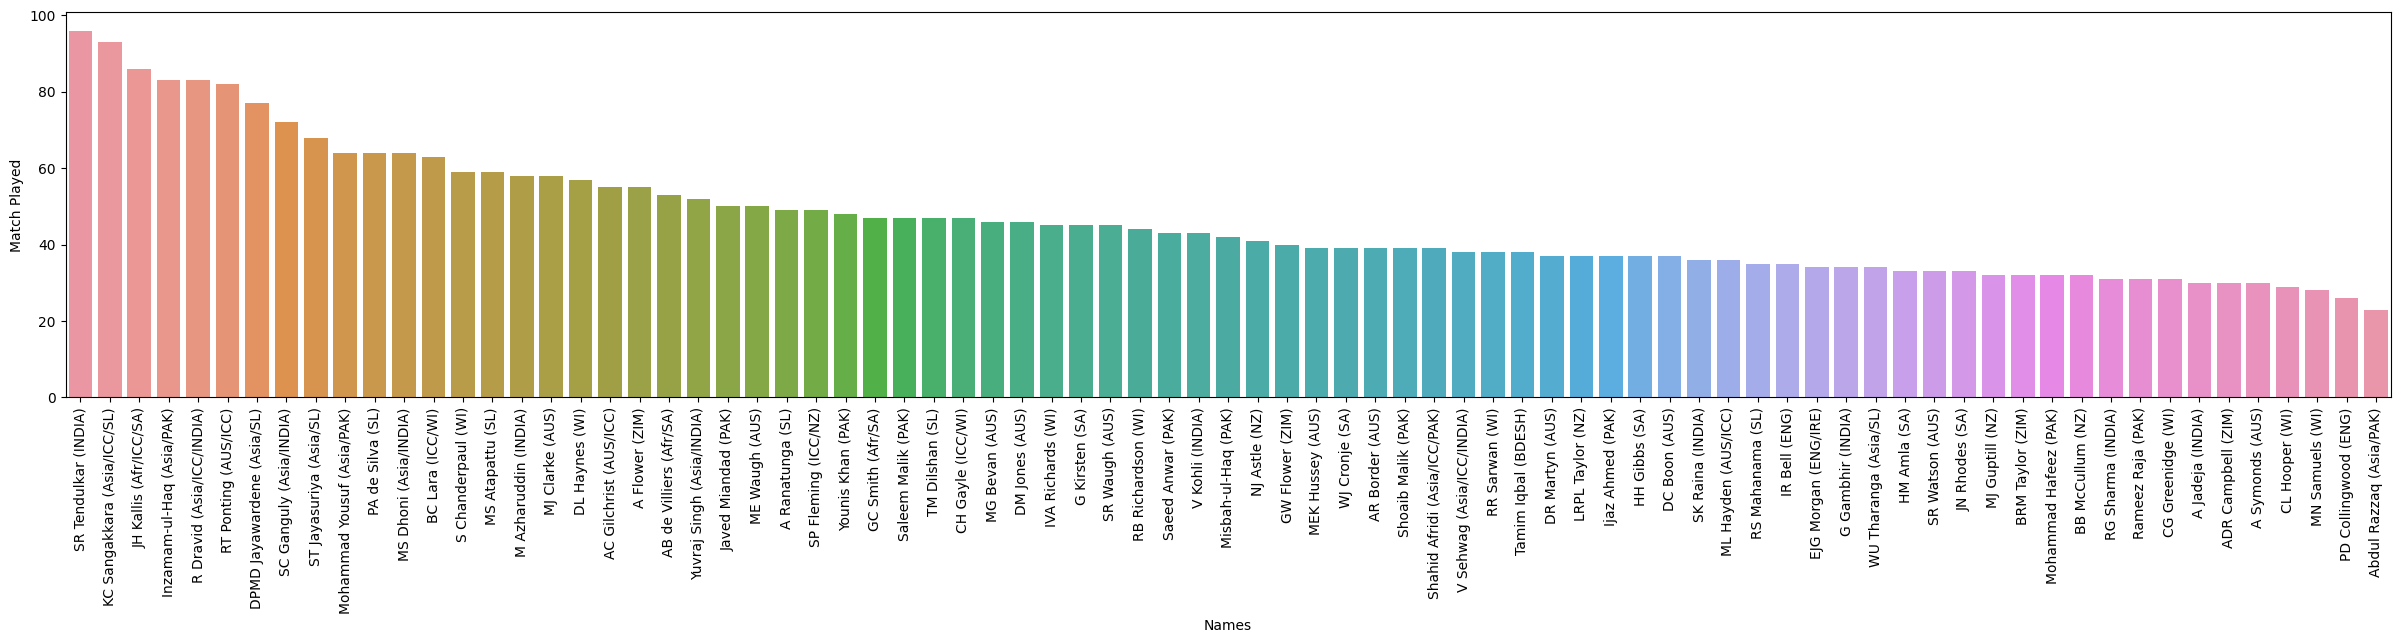

0


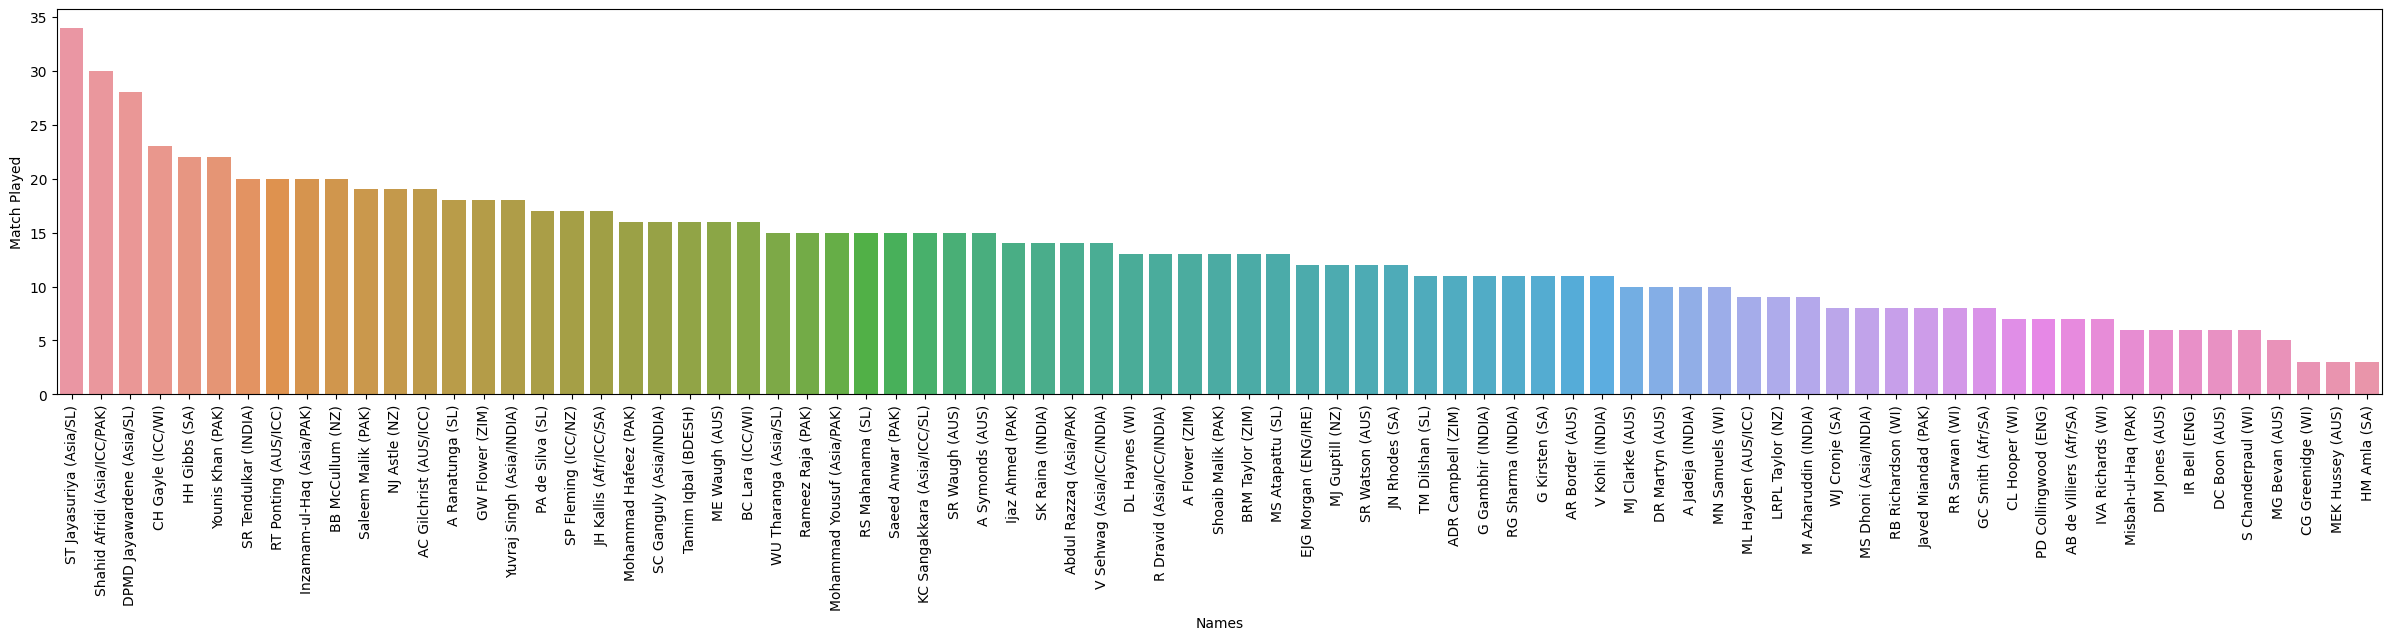

Exp


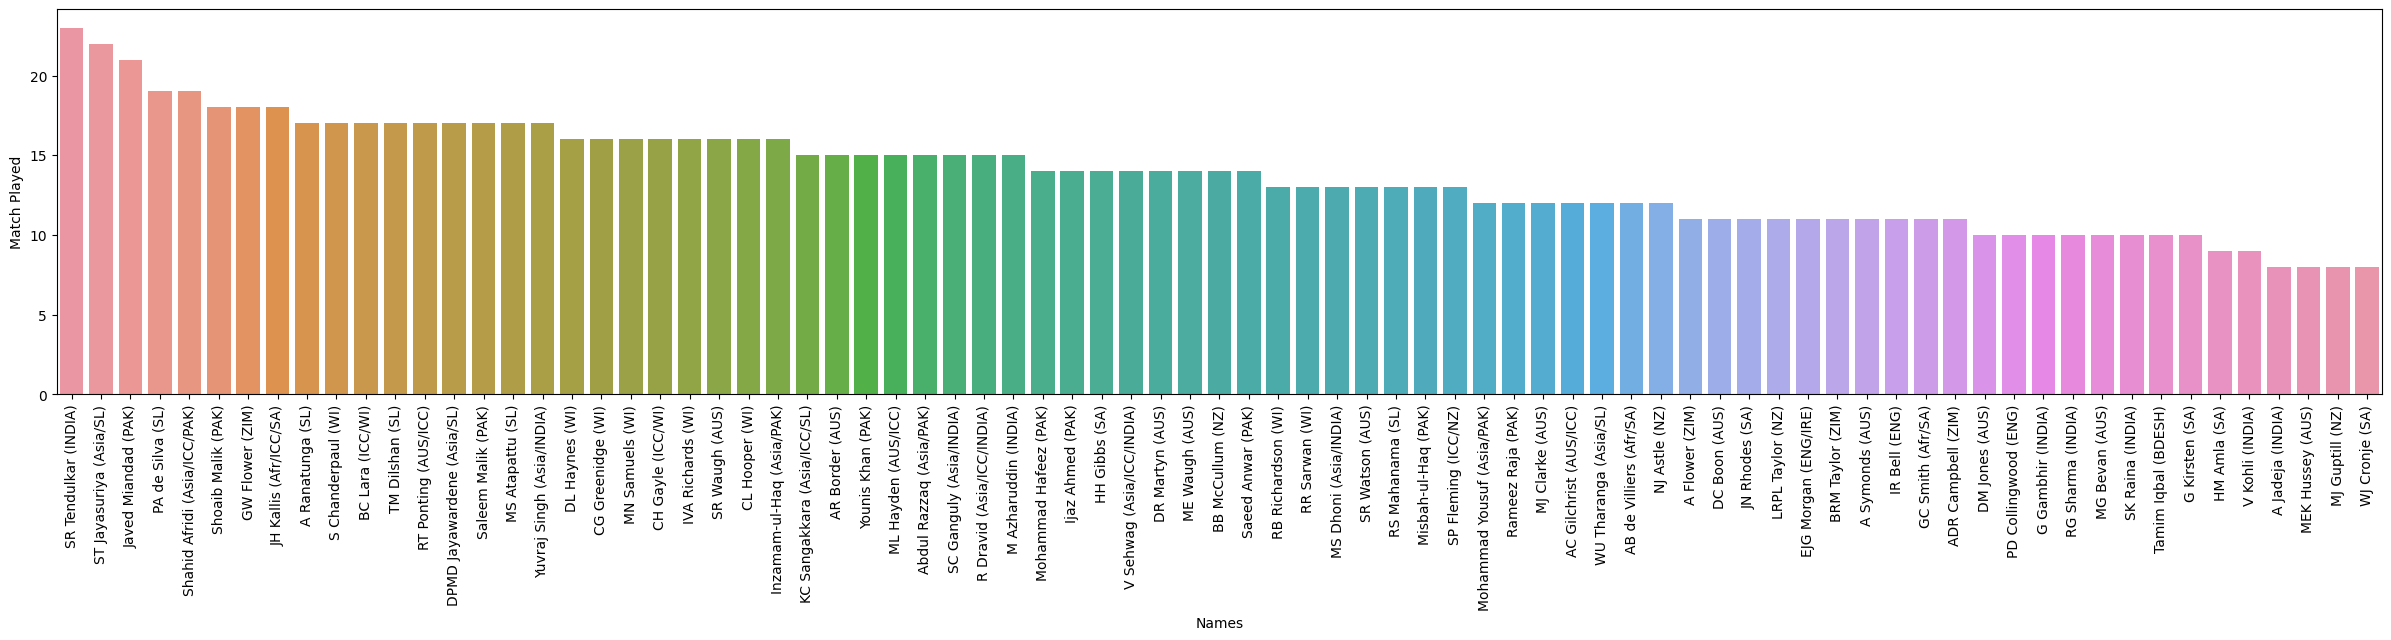

In [114]:
for col in df.columns:
    if(col != 'Player'):
        print(col)
        plt.figure(figsize = (30, 5))
        mat = df[['Player',col]].sort_values(col,ascending=False)
        ax = sns.barplot(x = 'Player',y = col, data = mat)
        ax.set(xlabel = 'Names', ylabel = 'Match Played')
        plt.xticks(rotation = 90)
        plt.show()

**Insights-**
- With the help of above barplots we can see that most of the features is leading with 'SR Tendulkar' at first place.
- According to Runs Scored & 100s barplots we can see SR Tendular dominating by huge lead. The Point looks like an outlier in the plot but whereas inreality it is just the player who has overperformed.
- The Average 1st and 2nd place seems to be pretty close to each other.

### Let's check the correlation coefficients to see which variables are highly correlated

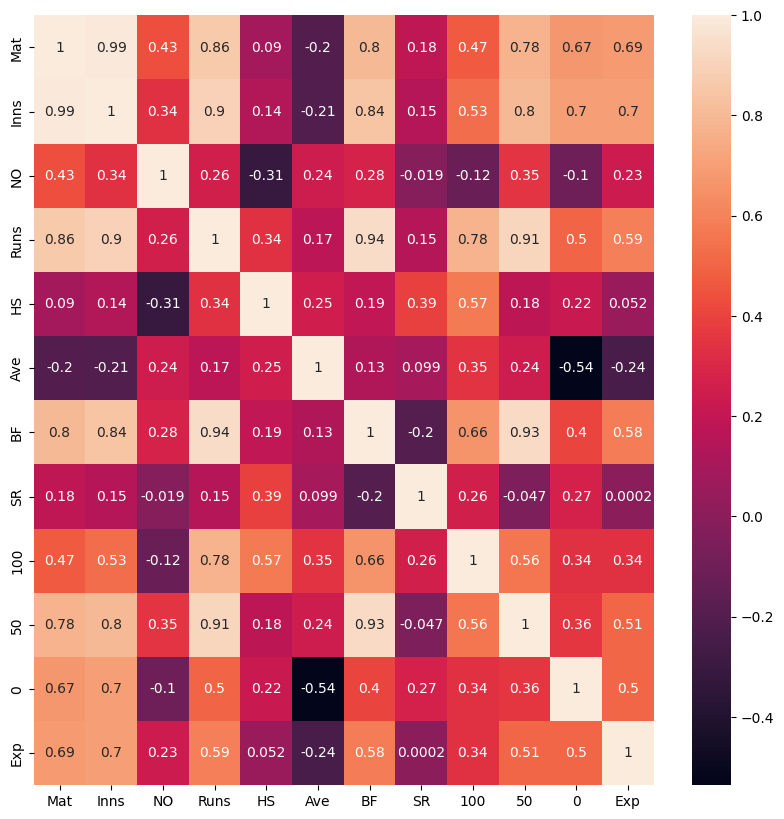

In [115]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Insights-**
- Mat and Inns are highly correlated with correlation of 0.99
- Mat and Runs are highly correlated with correlation of 0.86
- Runs and Inns are highly correlated with correlation of 0.90
- Many of the features are corelated to each other and it makes sense as these are cricket match score details every features would be some calculation derived from other


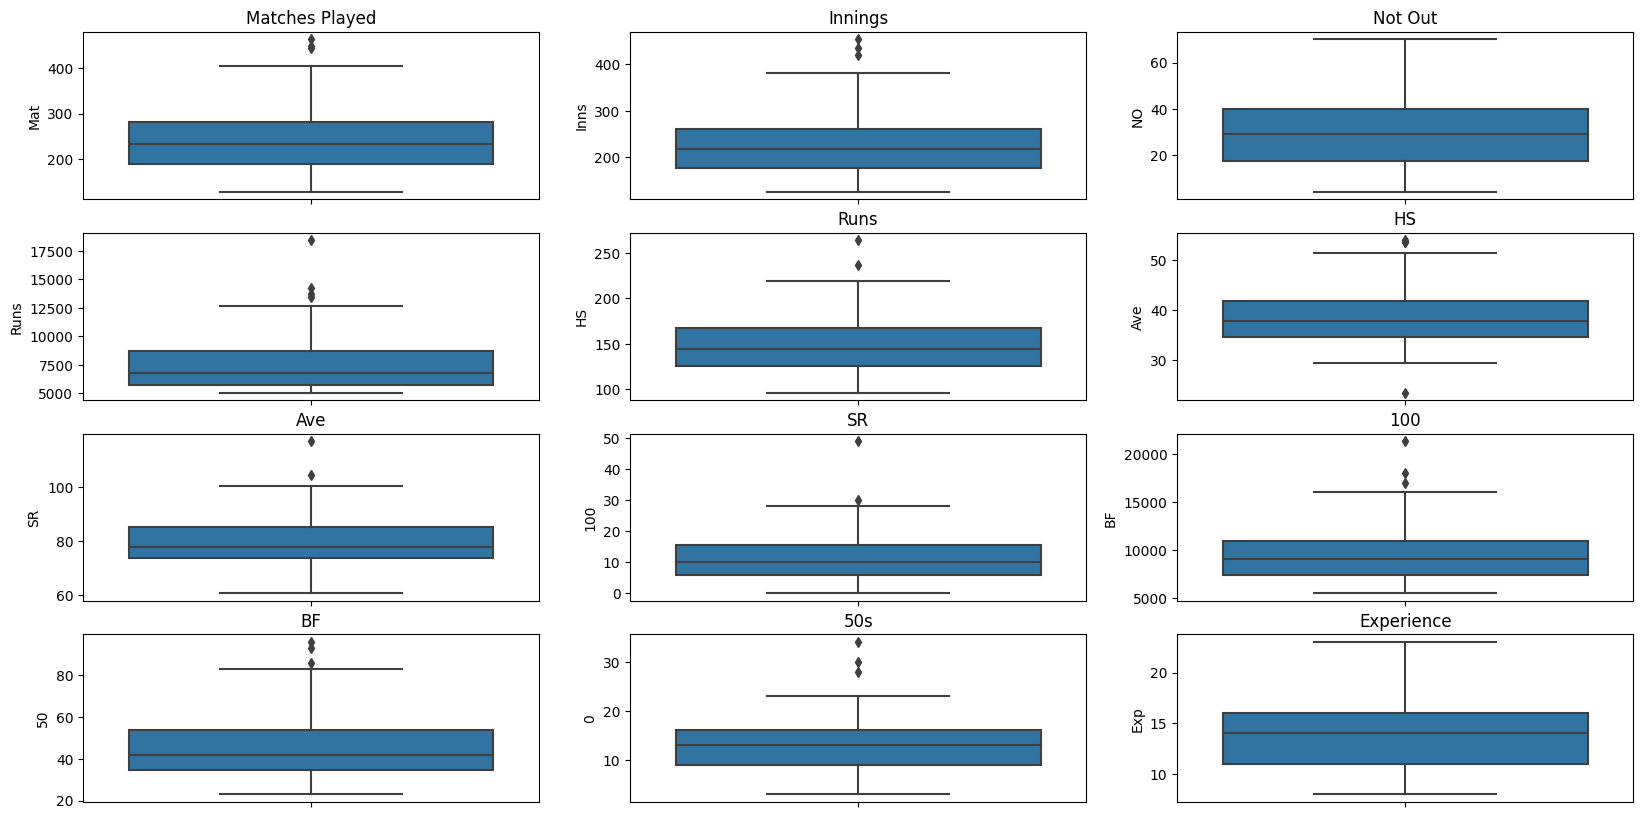

In [116]:
f, axes = plt.subplots(4,3, figsize=(20, 10))

s = sns.boxplot(y = df.Mat,ax = axes[0,0])
axes[0,0].set_title('Matches Played')

s = sns.boxplot(y = df.Inns,ax = axes[0,1])
axes[0,1].set_title('Innings')

s = sns.boxplot(y = df.NO,ax = axes[0,2])
axes[0,2].set_title('Not Out')

s=sns.boxplot(y=df.Runs,ax=axes[1, 0])
axes[1, 1].set_title('Runs')

s=sns.boxplot(y=df.HS,ax=axes[1, 1])
axes[1, 2].set_title('HS')

s=sns.boxplot(y=df.Ave,ax=axes[1, 2])
axes[2, 0].set_title('Ave')

s=sns.boxplot(y=df.SR,ax=axes[2, 0])
axes[2, 1].set_title('SR')

s=sns.boxplot(y=df['100'],ax=axes[2, 1])
axes[2, 2].set_title('100')

s=sns.boxplot(y=df.BF,ax=axes[2, 2])
axes[3, 0].set_title('BF')

s=sns.boxplot(y=df['50'],ax=axes[3, 0])
axes[3, 1].set_title('50s')

s=sns.boxplot(y=df['0'],ax=axes[3, 1])
axes[3, 2].set_title('0s')

s=sns.boxplot(y=df['Exp'],ax=axes[3, 2])
axes[3, 2].set_title('Experience') 

plt.show()

### Alternate Top 10 Plots

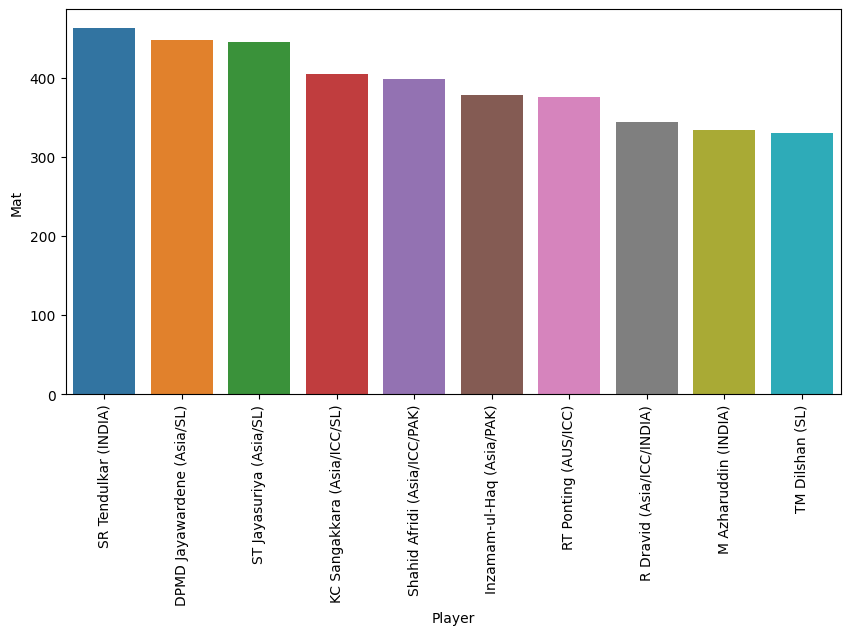

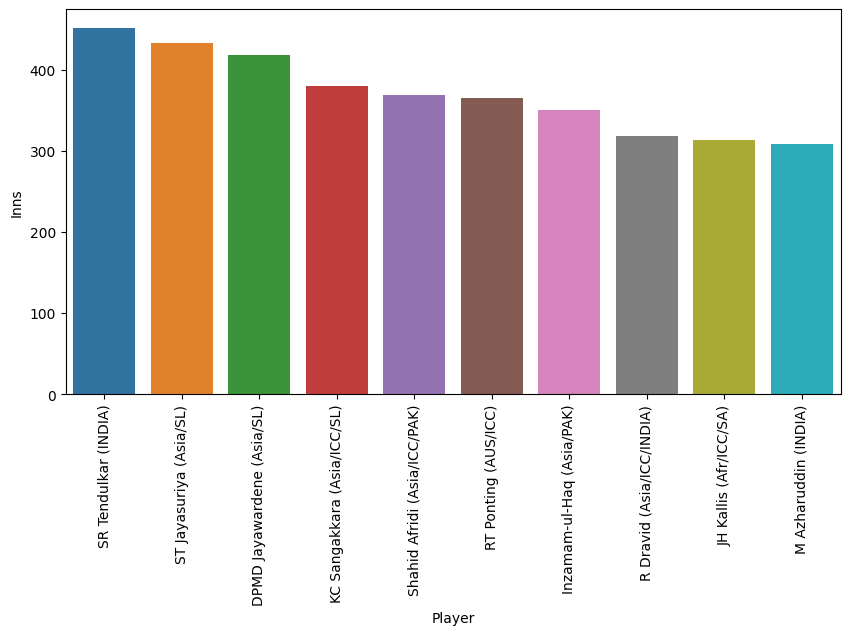

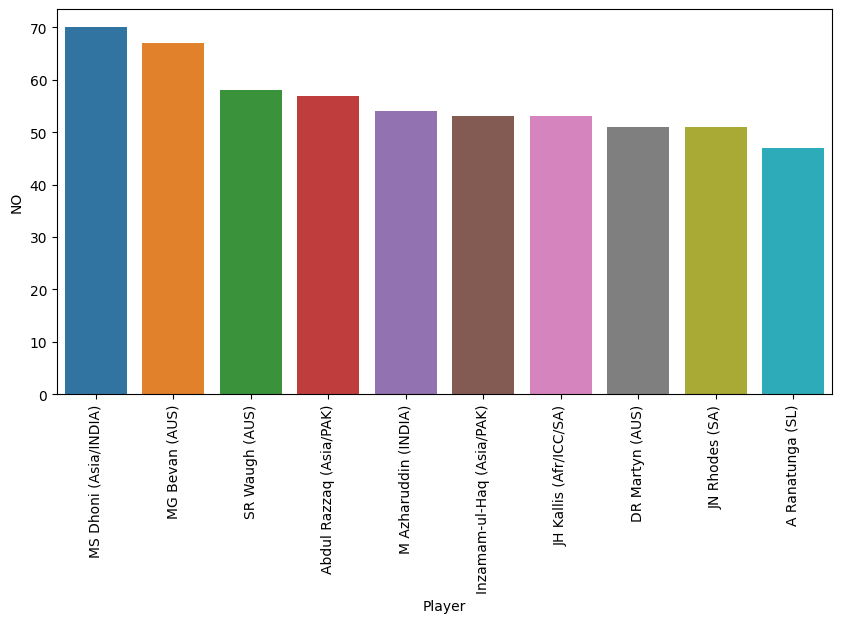

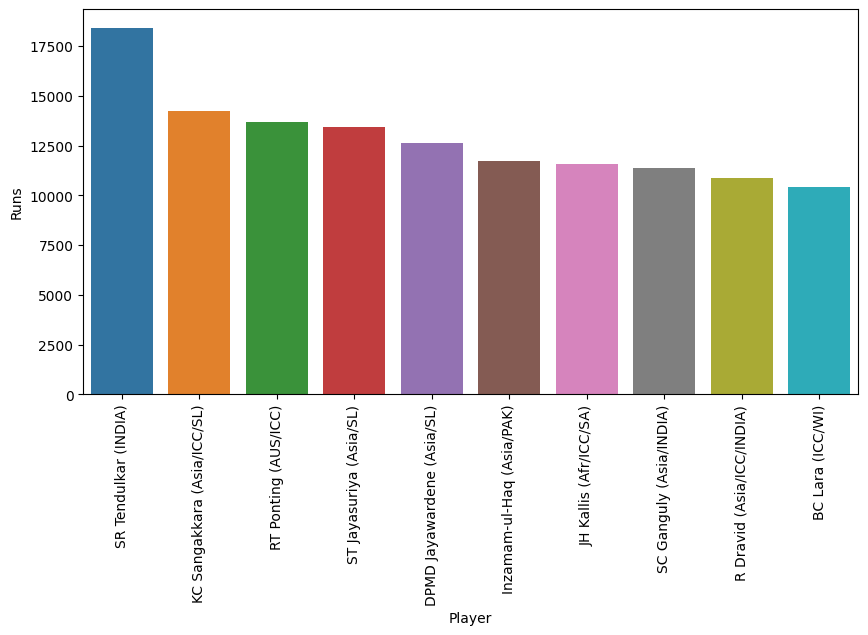

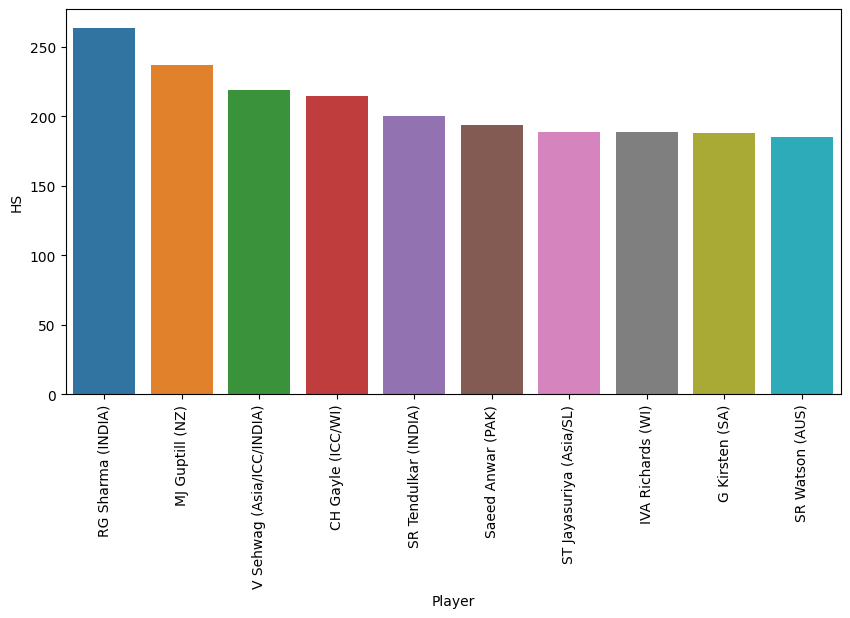

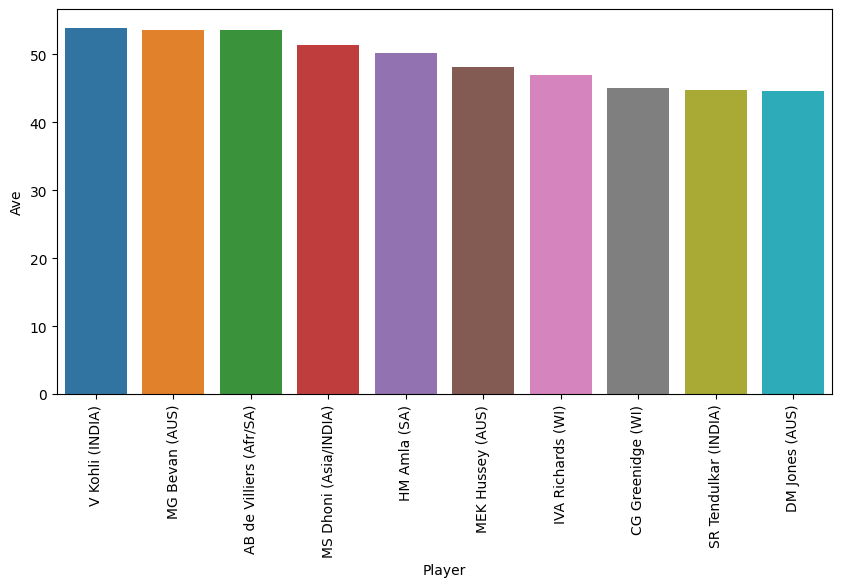

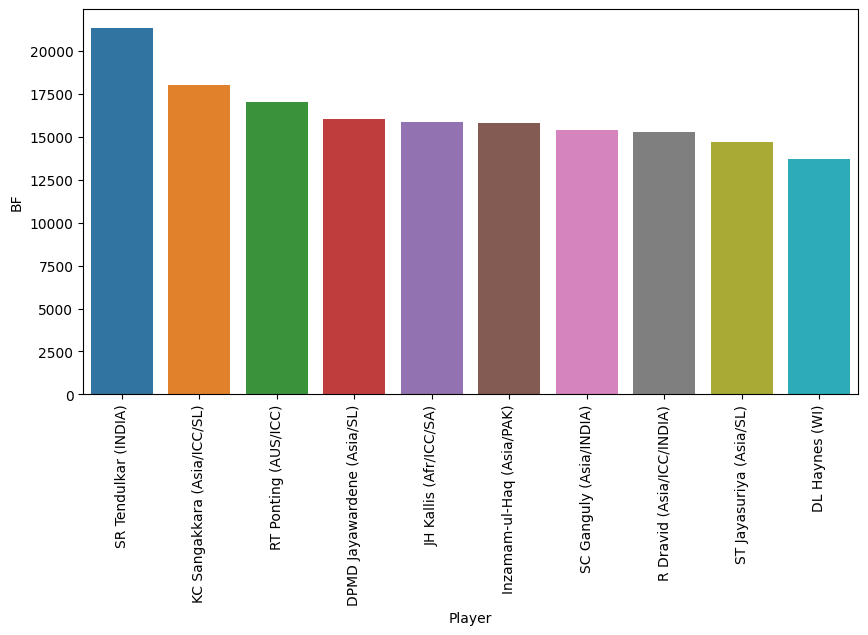

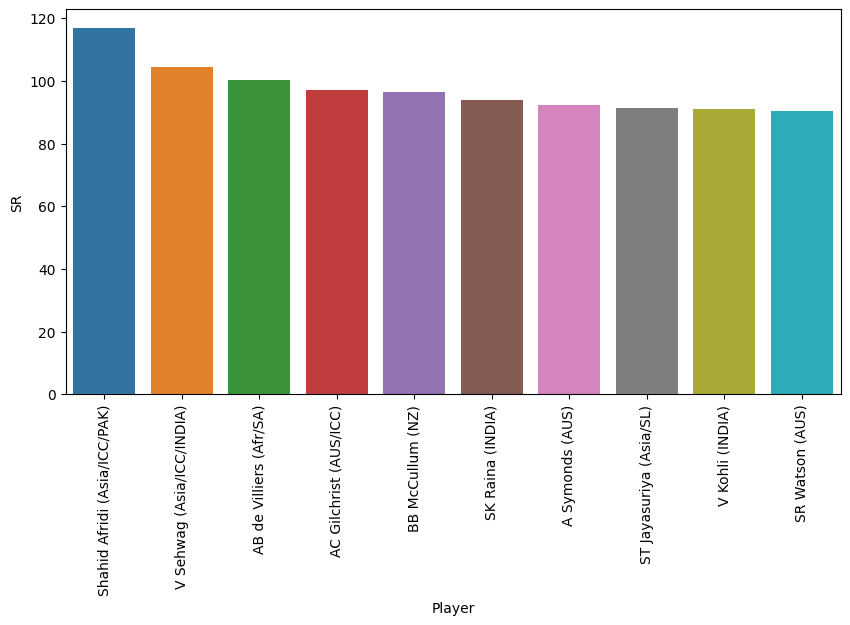

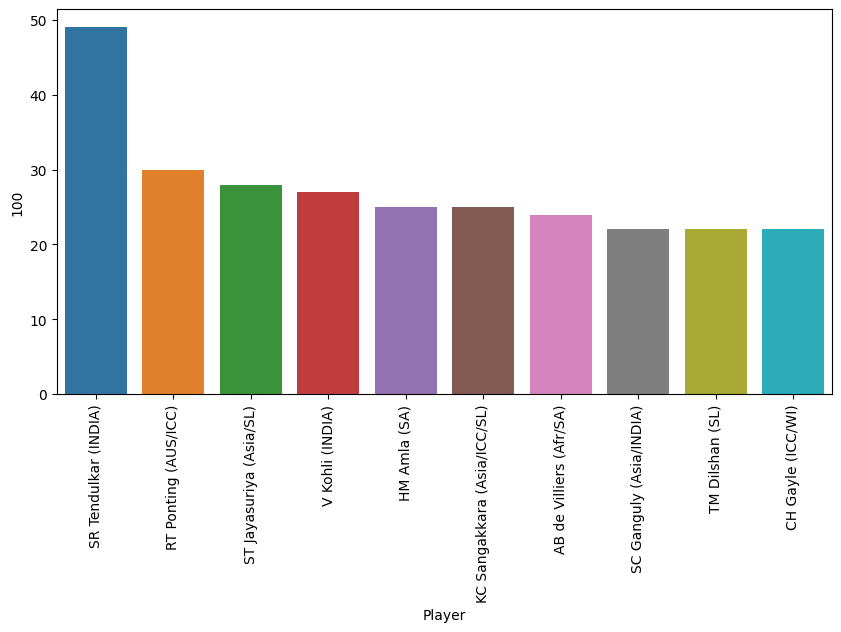

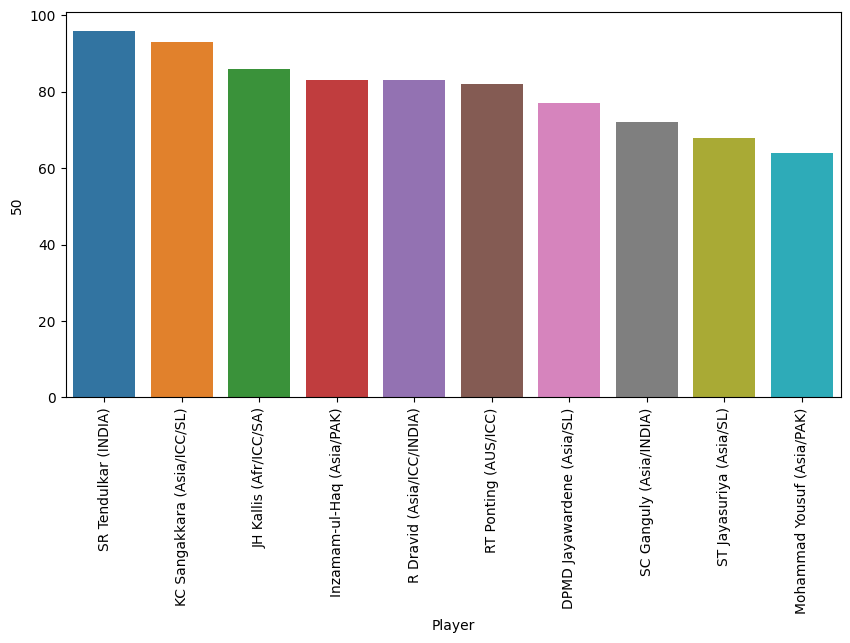

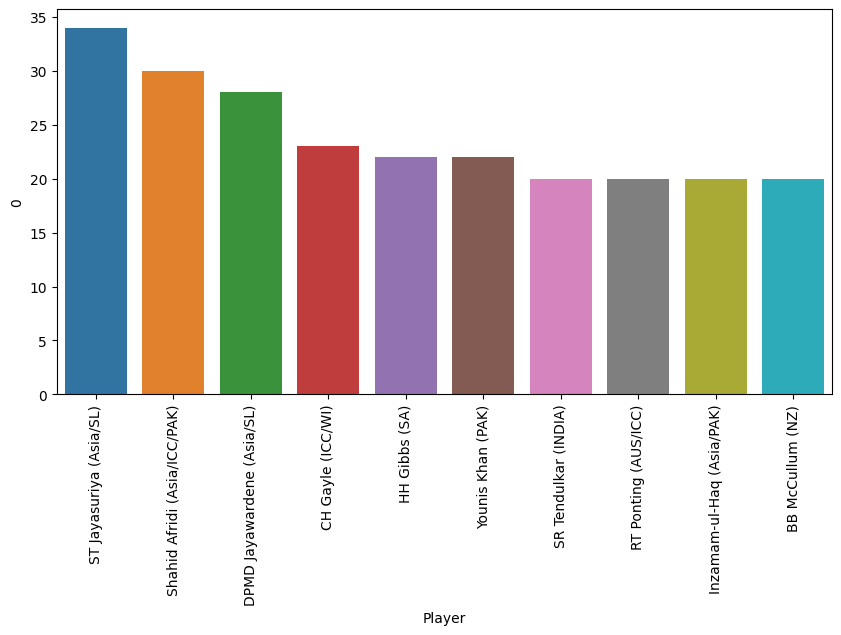

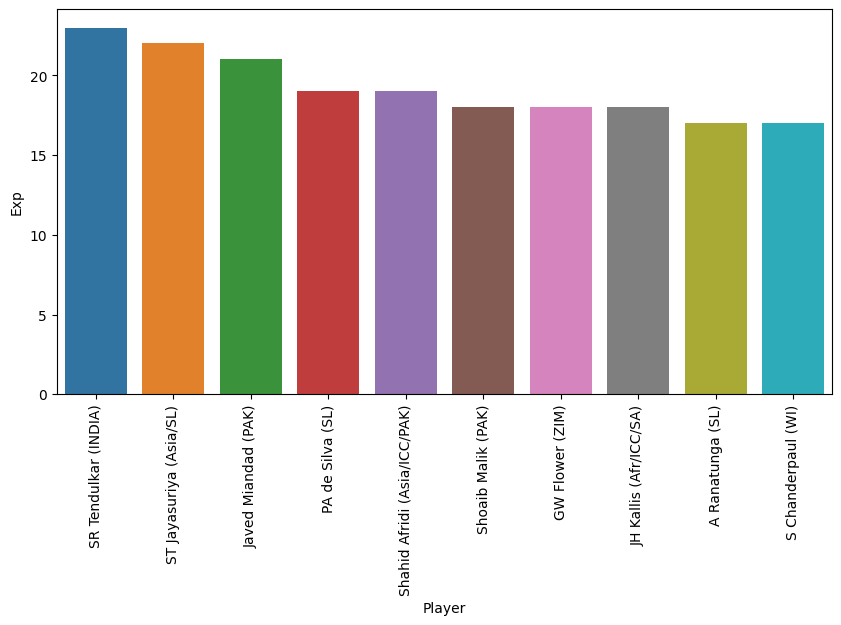

In [117]:
for col in df.columns:
    if col != 'Player':
        plt.figure(figsize = (10,5))
        top10 = df[['Player',col]].sort_values(col, ascending = False).head(10)
        ax = sns.barplot(x='Player', y=col, data= top10)
        plt.xticks(rotation = 90)
        plt.show()

#### Histogram or each numerical variable

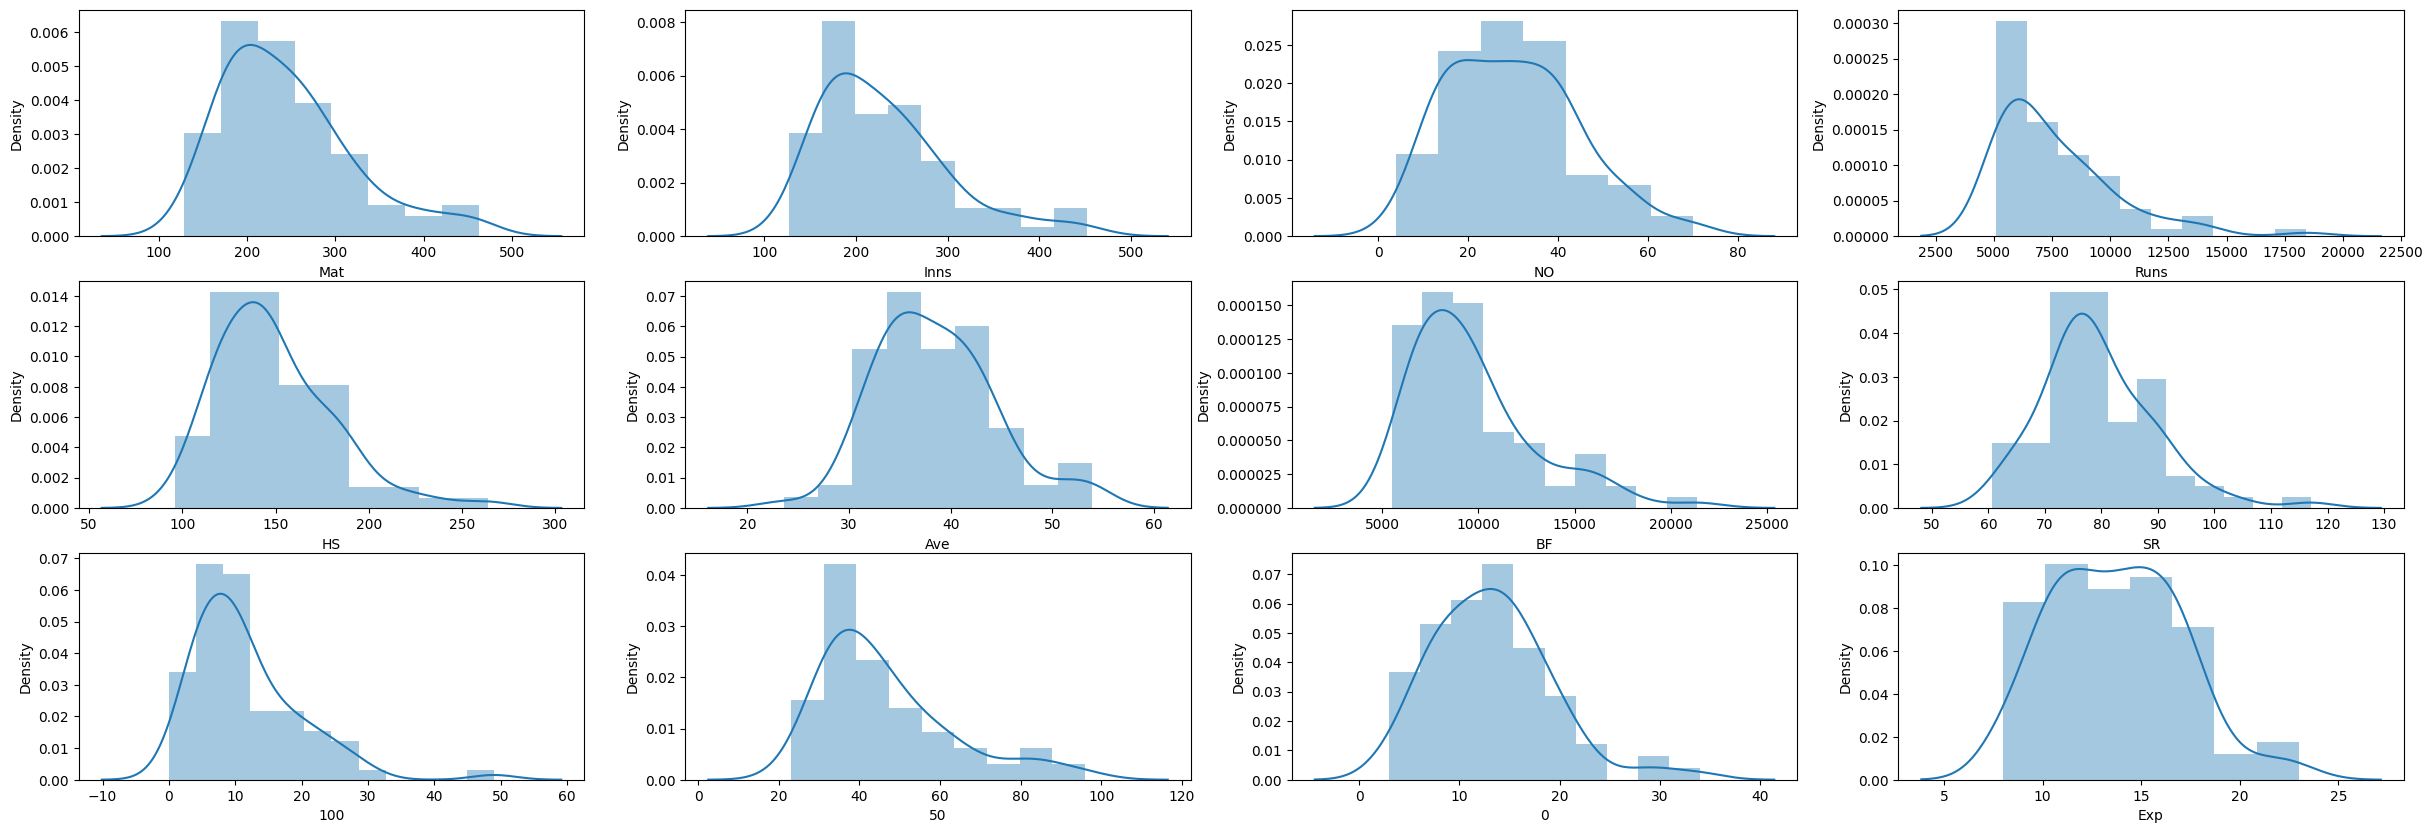

In [118]:
plt.figure(figsize = (30,10))
features=[ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100','50', '0', 'Exp']
for i in enumerate(features):
    plt.subplot(3,4,i[0]+1)
    sns.distplot(df[i[1]])

Percentile Capping (Winsorization) for outliers handling

In [119]:
# Q3 = df['Inns'].quantile(0.99)
# Q1 = df['Inns'].quantile(0.01)
# new = df[(df['Inns'] <= Q3) & (df['Inns'] >= Q1)]

# Q3 = df['Mat'].quantile(0.99)
# Q1 = df['Mat'].quantile(0.01)
# new = df[(df['Mat'] <= Q3) & (df['Mat'] >= Q1)]

# Q3 = df['NO'].quantile(0.99)
# Q1 = df['NO'].quantile(0.01)
# new = df[(df['NO'] <= Q3) & (df['NO'] >= Q1)]

# Q3 = df['Runs'].quantile(0.99)
# Q1 = df['Runs'].quantile(0.01)
# new = df[(df['Runs'] <= Q3) & (df['Runs'] >= Q1)]

# Q3 = df['HS'].quantile(0.99)
# Q1 = df['HS'].quantile(0.01)
# new = df[(df['HS'] <= Q3) & (df['HS'] >= Q1)]

# Q3 = df['Ave'].quantile(0.99)
# Q1 = df['Ave'].quantile(0.01)
# new = df[(df['Ave'] <= Q3) & (df['Ave'] >= Q1)]

# Q3 = df['BF'].quantile(0.99)
# Q1 = df['BF'].quantile(0.01)
# new = df[(df['BF'] <= Q3) & (df['BF'] >= Q1)]

# Q3 = df['SR'].quantile(0.99)
# Q1 = df['SR'].quantile(0.01)
# new = df[(df['SR'] <= Q3) & (df['SR'] >= Q1)]

# Q3 = df['100'].quantile(0.99)
# Q1 = df['100'].quantile(0.01)
# new = df[(df['100'] <= Q3) & (df['100'] >= Q1)]

# Q3 = df['50'].quantile(0.99)
# Q1 = df['50'].quantile(0.01)
# new = df[(df['50'] <= Q3) & (df['50'] >= Q1)]

# Q3 = df['0'].quantile(0.99)
# Q1 = df['0'].quantile(0.01)
# new = df[(df['0'] <= Q3) & (df['0'] >= Q1)]

# Q3 = df['Exp'].quantile(0.99)
# Q1 = df['Exp'].quantile(0.01)
# new = df[(df['Exp'] <= Q3) & (df['Exp'] >= Q1)]

In [130]:
df_drop = df.copy()
player = df.drop('Player',axis = 1)

#### Standardizing the features

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(player)
scaled_data

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [140]:
new_df = pd.DataFrame(scaled_data,columns=['Mat','Inns','NO','Runs','HS','Ave','BF','SR','100','50','0','Exp'])
new_df.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


### Model Building

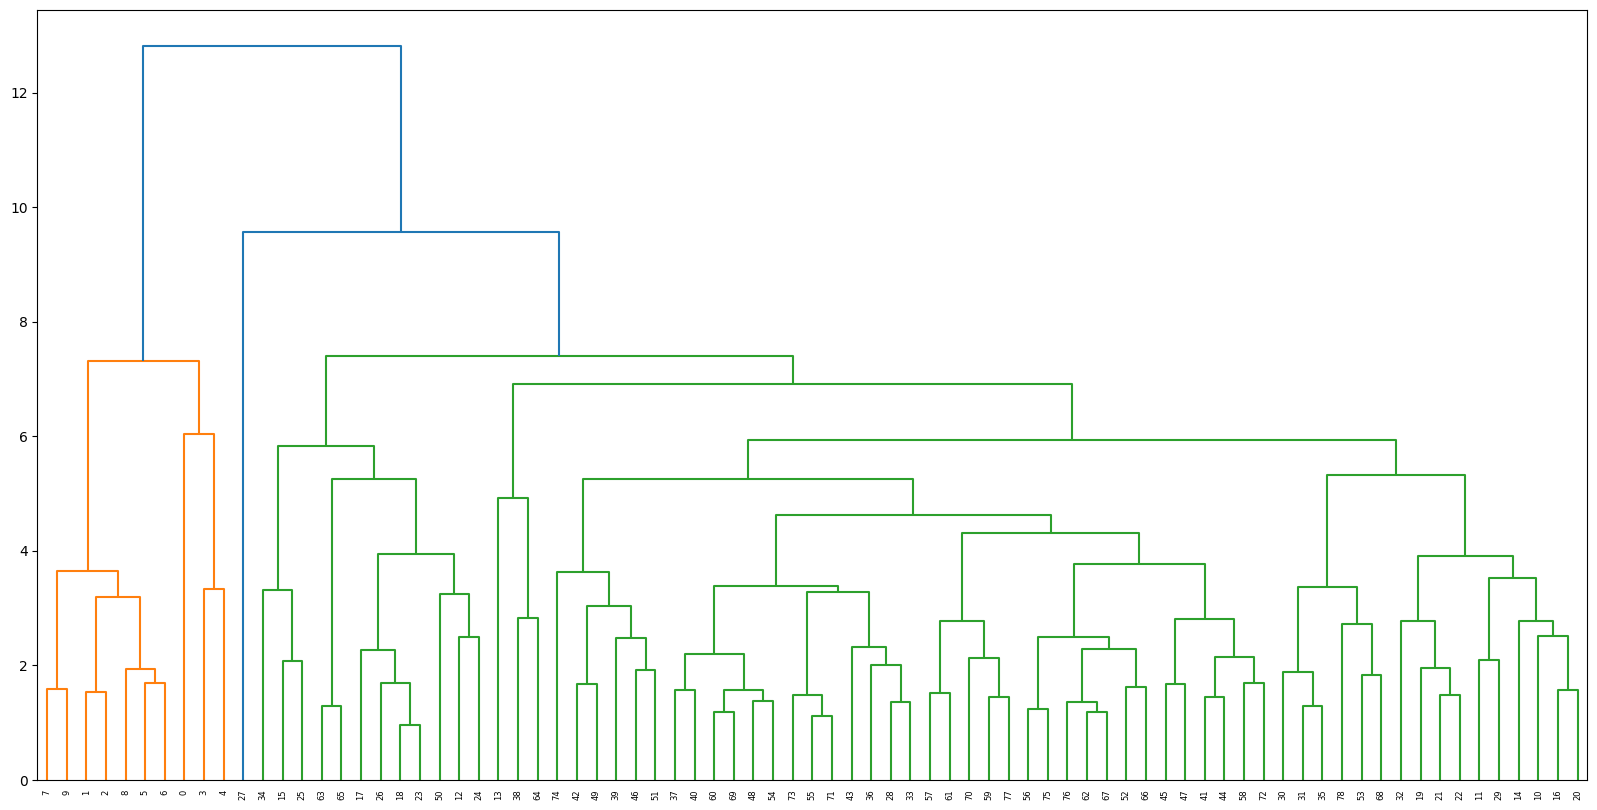

In [141]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

mergings = linkage(new_df,method='complete',metric='euclidean')
plt.figure(figsize = (20, 10))
dendrogram(mergings)
plt.show()

In [142]:
from scipy.cluster.hierarchy import cut_tree
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [143]:
df_hc = df.copy()
df_hc['Cluster_Label'] = cluster_labels
df_hc

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Label
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,1
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,1
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,1
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,1


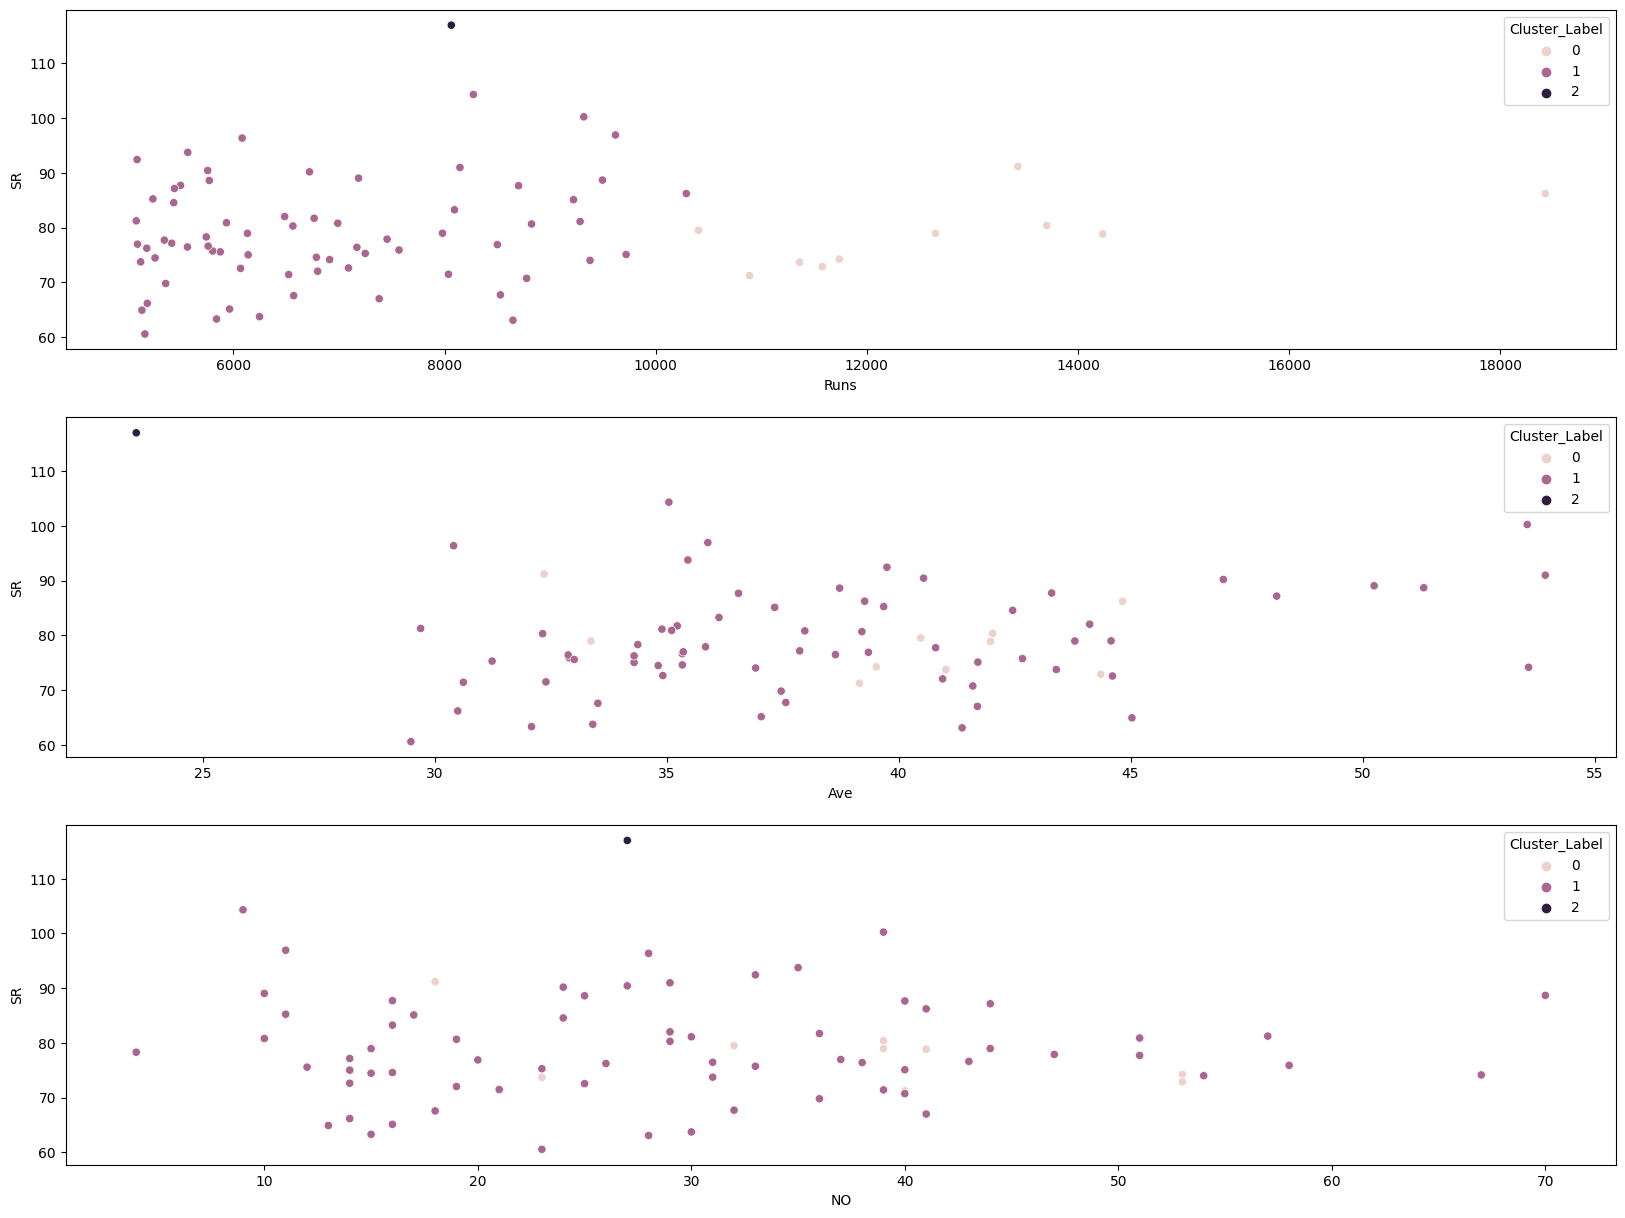

In [144]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Runs',y = 'SR',hue = 'Cluster_Label',data = df_hc,legend='full')
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave',y = 'SR',hue = 'Cluster_Label',data = df_hc,legend='full')
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO',y = 'SR',hue = 'Cluster_Label',data = df_hc,legend='full')
plt.show()

In [145]:
df_hc[df_hc['Cluster_Label']==0].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Label
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,0


In [146]:
df_hc[df_hc['Cluster_Label']==1].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#MiddleOrders 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Label
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,1
10,TM Dilshan (SL),330,303,41,10290,161,39.27,11933,86.23,22,47,11,17,1
30,SR Waugh (AUS),325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1
20,Yuvraj Singh (Asia/INDIA),304,278,40,8701,150,36.55,9924,87.67,14,52,18,17,1


In [148]:
df_hc[df_hc['Cluster_Label']==2].sort_values(by = ['Mat','Ave','SR'], ascending = [False,False,False]).head()
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Label
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.0,6,39,30,19,2
